In [5]:
# Setup
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# Make sure that caffe is on the python path
caffe_root = '/home/azamosavi/Azamosavi/MachineLearning/caffe-master'
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

model_prototxt = 'deploy.prototxt'
pretrained_model = os.path.join(caffe_root,'models/bvlc_alexnet/bvlc_alexnet.caffemodel')

caffe.set_mode_cpu()
net = caffe.Classifier(model_prototxt, pretrained_model,
                       mean=np.load(os.path.join(caffe_root,'python/caffe/imagenet/ilsvrc_2012_mean.npy')).mean(1).mean(1),
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

(227, 227)


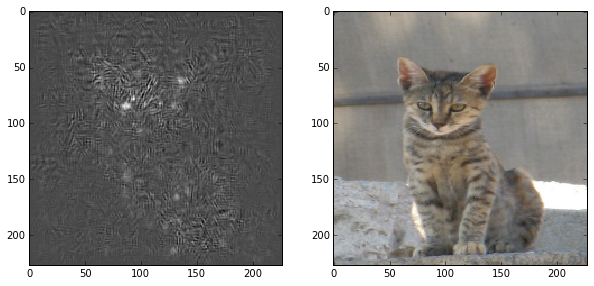

In [6]:
image_file = 'cat.jpg'
input_image = caffe.io.load_image(image_file)

label_index = 281 # 99: goose, 285: cat, 543: dumbbell
input_data = np.zeros((1,3,227,227))
label = np.zeros((1,1,1,1000))
label[0,0,0,label_index] = 1
learning_rate = 1000

prediction = net.predict([input_image])

# Compute gradient of class score with respect to input image.
# Store visualization matrix in "saliency_map"
# TODO
label_final = label
label_final[0,0, :, :] = prediction
bw = net.backward(**{net.outputs[0]: label_final})
#diff = bw
#saliency_map_wc = net.blobs['data'].diff[0,:,:,:]
saliency_map_wc = bw['data']
#print saliency_map_wc.shape
#saliency_map = saliency_map.maximum
saliency_map = np.amax(saliency_map_wc[0,:,:,:], axis=0)
print saliency_map.shape

# 
# 
# 
# 
# 
# END OF YOUR CODE

plt.subplot(1,2,1)
plt.imshow(saliency_map)
plt.subplot(1,2,2)
plt.imshow(net.transformer.deprocess('data', net.blobs['data'].data[0]))